## Day 10 - Task 2

### Authors: Diego García López, Andrea Álvarez Pérez

As an example of SVM and PCA in action, you will solve the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures 3,000 pixels each.
A fetcher for the dataset is built into Scikit-Learn:

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


1. Try to plot the faces from faces.images matrix and faces.target_names as labels. TIP: use subplots and imshow functions from matplotlib

2. Make pipeline of SVM and RandomizedPCA model using sklearn library (make_pipeline command).TIP: use nonlinear Gaussian kernel in SVM (rbf) and number of PCA components (try 50 and 150).

3. For the sake of testing our classifier output, you have to will split the data into a training and testing set. TIP: use training_test_split function from _sklearn.modelselection

4. Perform a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. TIP: use GridSearchCV from _sklearn.modelselection, use following values for 'svcC': [1, 5, 10, 50] and 'svcgamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters.

5. Print best parameters from grid search. If The optimal values fall fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

6. Use best estimator (bestestimator function) from grid search to predict labels for test sample generated in 3). TIP: use predict function

7. Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1).

### Problem 1

In [2]:
# Packages
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

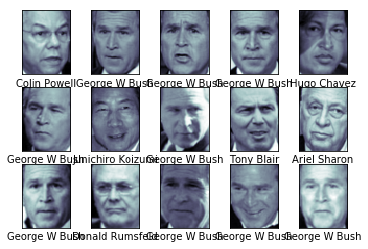

In [3]:
fig, ax = plotter.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

### Problem 2

``n_components`` was set in the values 50 and 150. We stablished ``random_state = 42`` in order to control the random number generator used, and ``class_weight = 'balance'`` 

# PORQUE CLASS_WEIGHT = BALANCE

In [17]:
pca = RandomizedPCA(n_components=50, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### Problem 3

Obtain train and test dataset

In [18]:
X = faces.data
y = faces.target

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

### Problem 4

We can create a dictionary with all the possible ``C`` and ``gamma`` values we want to check and execute the pipeline with the determined SVC parameters. Subsequently we have to train the model grid with train dataset.

In [20]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}


grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain, ytrain)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Problem 5

Determine the model grid's best parameter values.

In [21]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.005}


### Problem 6

Use the model with the best estimator to predict the labels of the test dataset. With this we can check if the chosen parameter values are good enough.

In [22]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

### Problem 7

With some of the predicted data we can plot the images with the corresponding predicted label and check how good is my classfier. Then we can check the accurancy of the model with ``accuracy_score``.

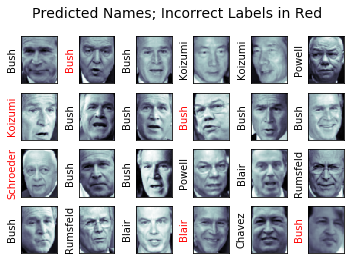

In [23]:
fig, ax = plotter.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [25]:
accuracy_score(ytest, yfit)

0.8011869436201781

### Conclusions

With ``n_components = 150``:
- Best ``C`` parameter value: 10.0
- Best ``gamma`` parameter value: 0.001
- Number of incorrect labels plotted: 1
- Accurancy score: 0.8486 --> 84.86%
    
With ``n_components = 50``:
- Best ``C`` parameter value: 10.0
- Best ``gamma`` parameter value: 0.005
- Number of incorrect labels plotted: 6
- Accurancy score: 0.8011 --> 80.11%

Although ``C`` parameter is the same with both ``n_components`` parameter values, ``gamma`` is 5 times higher and the incorrect predicted labels is 6 times higher when ``n_components = 50``. 

Also, we discovered the correct grouping for 84.86% of the input data when ``n_components = 150``. 